# Spectractor tutorial

The goal of this notebook is to demonstrate the capabilities of the Spectractor pipeline (still under construction). This pipeline is designed to extract a spectrum from an image given the coordinate (in pixels) of the object.

## Import the pipeline

In [10]:
%load_ext autoreload
%autoreload 2
from spectractor.spectractor import Spectractor
from spectractor.spectroscopy import Spectrum
import spectractor.parameters as parameters

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basic use

The basic use of the pipeline consists first to define: 
- the path to the fits image from which to extract the image, 
- the path of the output directory to save the extracted spectrum (created automatically if does not exist yet),
- the rough position of the object in the image,
- optionally the name of the target (to search for the extra-atmospheric spectrum if available).

In [3]:
filename="../tests/data/reduc_20170605_028.fits"
output_directory="../outputs/"
guess = [745,643]
target="3C273"

Then the spectrum is simply extracted from the image and saved in a new fits file using the command:

In [4]:
Spectractor(filename,output_directory,guess,target)

2018-06-12 15:39:37  Image      find_target_1Dprofile WARNING 
	X position determination of the target probably wrong
2018-06-12 15:39:37  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 20 pixels over 2048 pixels:  -1.26 vs 0.00


## Advanced use

### Verbose and debug modes

The default usage of the Spectractor function only prints warning on the screen. The format of the logging message gives first the time of execution, the class involved, the class method involved, the logging level, and a message.

To show more details on the process followed by Spectractor, simply set VERBOSE variable to True. This also permit to plot the output spectrum on the screen:

2018-06-12 15:40:14  spectractor.spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-06-12 15:40:14  Image      load                 INFO   
	Loading image ../tests/data/reduc_20170605_028.fits...
2018-06-12 15:40:14  Image      load                 INFO   
	Image loaded
2018-06-12 15:40:14  Image      load                 INFO   
	Loading disperser HoloPhAg...


Load disperser HoloPhAg:
	from /Users/jneveu/anaconda2/lib/python2.7/site-packages/spectractor/dispersers/HoloPhAg
Grating characteristics:
	N = 350.00 +/- 1.00 grooves/mm
	Average tilt of 0.0 degrees


2018-06-12 15:40:14  spectractor.spectractor Spectractor          INFO   
	Search for the target in the image...


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_2 SP_QUAL_2 SP_BIBCODE_2
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 


2018-06-12 15:40:28  Image      find_target_1Dprofile WARNING 
	X position determination of the target probably wrong
2018-06-12 15:40:28  Image      find_target          INFO   
	X,Y target position in pixels: 816.522,586.545
2018-06-12 15:40:28  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 20 pixels over 2048 pixels:  -1.26 vs 0.00
2018-06-12 15:40:28  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.26 degree
2018-06-12 15:40:31  spectractor.spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-06-12 15:40:31  Image      find_target          INFO   
	X,Y target position in pixels: 848.773,604.502
2018-06-12 15:40:31  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-06-12 15:40:31  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*10 pixels and background from 20 to 30 p

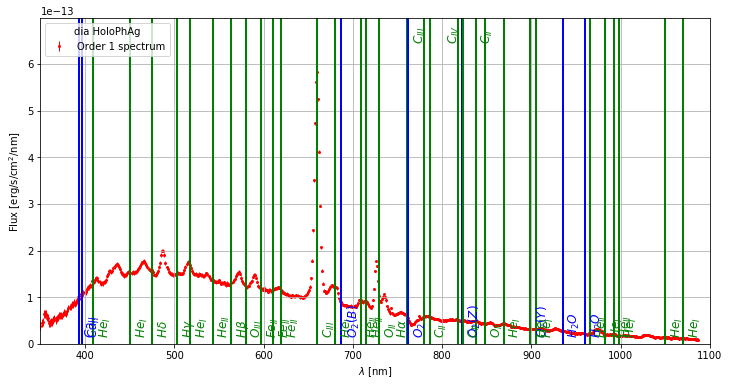

In [7]:
parameters.VERBOSE=True
Spectractor(filename,output_directory,guess,target)

In case of a suspected bug, user can enter the DEBUG mode, that gives more plots and outputs to check where the code may do something wrong. Note that VERBOSE mode is included in the DEBUG mode.

2018-06-12 15:40:34  spectractor.spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-06-12 15:40:34  Image      load                 INFO   
	Loading image ../tests/data/reduc_20170605_028.fits...
2018-06-12 15:40:34  Image      load                 INFO   
	Image loaded
2018-06-12 15:40:34  Image      load                 INFO   
	Loading disperser HoloPhAg...


Load disperser HoloPhAg:
	from /Users/jneveu/anaconda2/lib/python2.7/site-packages/spectractor/dispersers/HoloPhAg
Grating characteristics:
	N = 350.00 +/- 1.00 grooves/mm
	Average tilt of 0.0 degrees
MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_3 SP_QUAL_3 SP_BIBCODE_3
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 


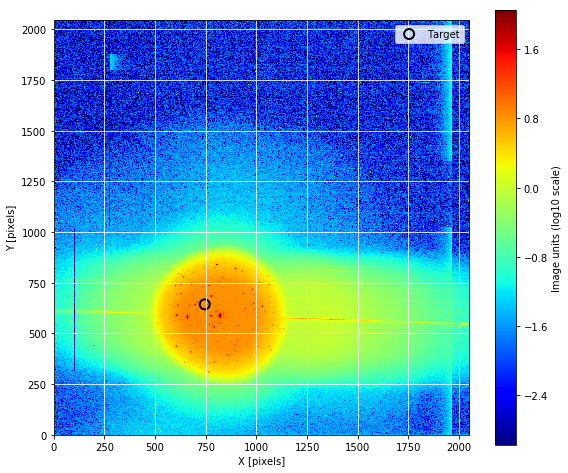

2018-06-12 15:40:35  spectractor.spectractor Spectractor          INFO   
	Search for the target in the image...
2018-06-12 15:40:53  Image      find_target_1Dprofile INFO   
	154 saturated pixels: set saturation level to 100 ADU/s.
2018-06-12 15:40:53  Image      find_target_1Dprofile WARNING 
	X position determination of the target probably wrong


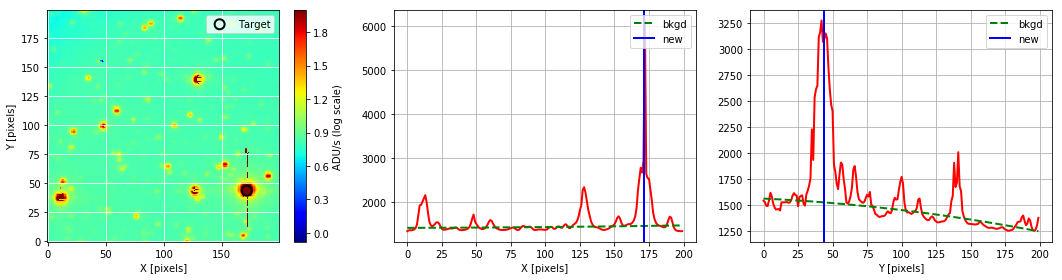

2018-06-12 15:40:54  Image      find_target          INFO   
	X,Y target position in pixels: 816.522,586.545
2018-06-12 15:40:54  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 20 pixels over 2048 pixels:  -1.26 vs 0.00


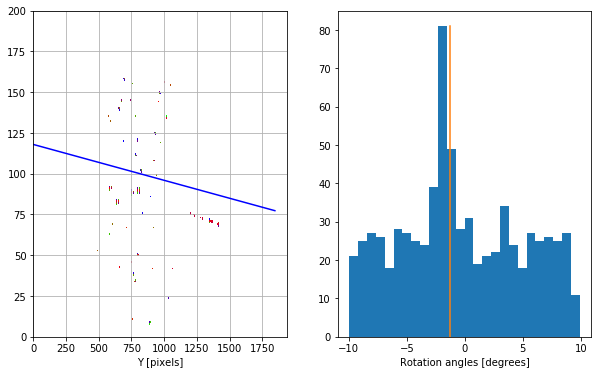

2018-06-12 15:40:54  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.26 degree


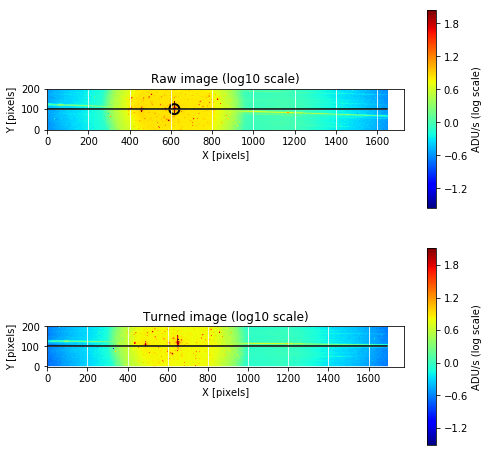

2018-06-12 15:41:01  spectractor.spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-06-12 15:41:10  Image      find_target_2Dprofile INFO   
	97 saturated pixels: set saturation level to 100 ADU/s.


Model: Star2D
Inputs: (u'x', u'y')
Outputs: (u'z',)
Model set size: 1
Parameters:
      amplitude       x_mean        y_mean        stddev    saturation
    ------------- ------------- ------------- ------------- ----------
    46.3978070186 69.2774127945 41.5084065786 5.47479246836      100.0


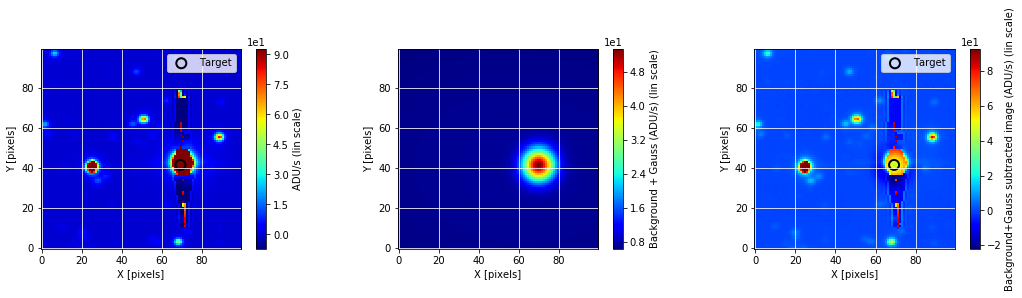

2018-06-12 15:41:20  Image      find_target          INFO   
	X,Y target position in pixels: 848.277,604.508
2018-06-12 15:41:20  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-06-12 15:41:20  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*10 pixels and background from 20 to 30 pixels


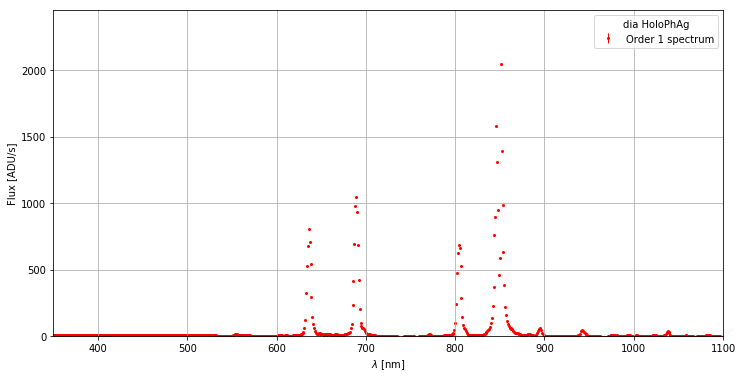

2018-06-12 15:41:21  Spectrum   save_spectrum        INFO   
	Spectrum saved in ../outputs/reduc_20170605_028_spectrum.fits


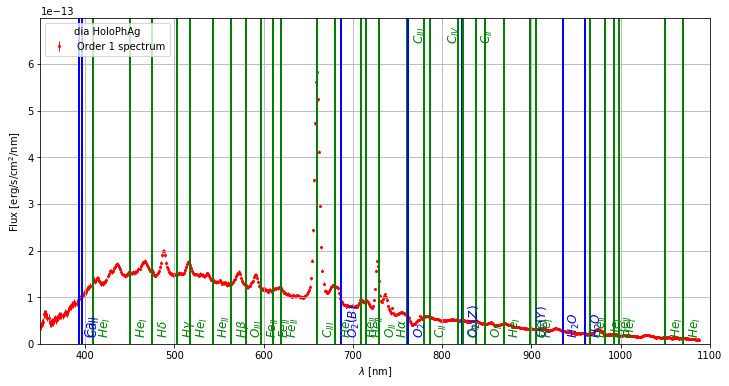

In [8]:
parameters.DEBUG=True
Spectractor(filename,output_directory,guess,target)

### Image and Spectrum classes

The Image and Spectrum classes have methods to load, save and plot images/spectra, and specific methods to extract the spectrum from the image. For instance, to load and plot the output spectrum, one can use:

2018-06-12 15:42:18  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ../outputs/reduc_20170605_028_spectrum.fits


MAIN_ID       RA           DEC      RA_PREC ... SP_TYPE_5 SP_QUAL_5 SP_BIBCODE_5
           "h:m:s"       "d:m:s"            ...                                 
------- ------------- ------------- ------- ... --------- --------- ------------
 3C 273 12 29 06.6951 +02 03 08.662       9 ...                                 
   Line   Tabulated Detected   Shift     FWHM   Amplitude     SNR  
              nm       nm        nm       nm                       
--------- --------- -------- --------- ------- ------------ -------
 $He_{I}$   517.893  516.026  -1.86778 6.57326  2.87824e-14 8.19559
$O_{III}$    579.98  572.157  -7.82338 6.36472  2.56172e-14 7.29435
$Fe_{II}$   597.471  590.603  -6.86806 5.58295  2.63254e-14 7.49598
$C_{III}$   660.253  660.009 -0.244139 6.69345  4.86392e-13 164.741
 $He_{I}$   680.524  677.428  -3.09624 14.5084   3.9863e-14 13.5016
$He_{II}$   708.672  708.971  0.299645 4.60082  1.51861e-14 5.14355
$He_{II}$   714.811  715.142  0.330626 4.82302  1.37875e-14 4.66

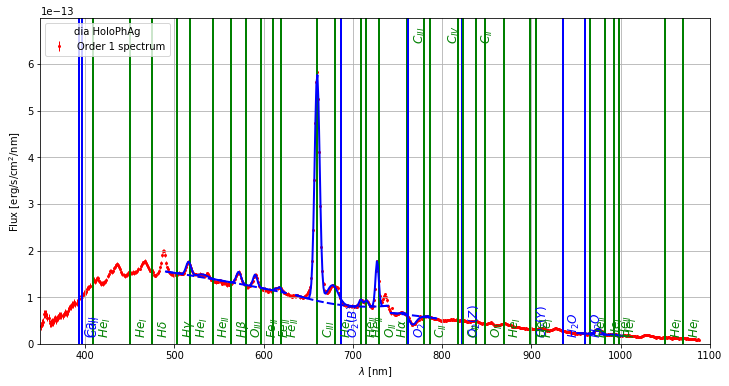

In [12]:
spec = Spectrum('../outputs/reduc_20170605_028_spectrum.fits')
spec.plot_spectrum(fit=True)

### Spectractor settings

Some settings parameters are defined in the XWINDOW python file. For instance the half-width (in pixel) of the search windows to find the object in the images are set by:

In [13]:
print 'Width of search window along X in pixels:',parameters.XWINDOW
print 'Width of search window along Y in pixels:',parameters.YWINDOW

Width of search window along X in pixels: 100
Width of search window along Y in pixels: 100


and in the rotated images by:

In [14]:
print 'Width of search window along X in pixels:',parameters.XWINDOW_ROT
print 'Width of search window along Y in pixels:',parameters.YWINDOW_ROT

Width of search window along X in pixels: 50
Width of search window along Y in pixels: 50


The edges of the output spectrum are floats specified by the LAMBDA_MIN and LAMBDA_MAX parameters (in nanometers):

In [15]:
print 'Minimum wavelenght:',parameters.LAMBDA_MIN,'nm'
print 'Maximum wavelenght:',parameters.LAMBDA_MAX,'nm'

Minimum wavelenght: 350 nm
Maximum wavelenght: 1100 nm
